<img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/Logo_Universidad_Politécnica_Salesiana_del_Ecuador.png" width="90%">
<h2>Práctica 5:
    Redes Neuronales Problemas Multiclase</h2>
<h3>Integrantes: Michelle Parraga, Andrés Alba </h3>

##  <span style="color:BLUE">1.1 DESCRIPCIÓN DE DATASET Y EXPLORACIÓN</span>

Carga del dataset desde un arhivo local.

Dataset: CIFAR10 que contiene 60000 imágenes (samples) de 10 categorías: 

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

1.1 El dataset se dividirá en 50000 imágenes para train y 10000 para test. 
Cada imagen de 32x32pixeles. 3 canales. 10000 imagenes por cada batch para evitar un desbordamiento de memoria.
Cada fila (imagen) de CIFAR10 es de 3072 columnas. 32pixeles x 32pixeles x 3canales = 3072 características 

url: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Para descomprimir el dataset del archivo tar.gz sería:

!tar xzvf cifar-10-python.tar.gz

In [1]:
import tarfile
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
print('importadas')

importadas


In [2]:
#Para cargar el Dataset desde la web
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Dataset Cargado')

Dataset Cargado


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
#Primera imagen
X_train[0].shape

(32, 32, 3)

In [5]:
X_trainReshapeImageRow=X_train.reshape((X_train.shape[0],3072))
print(X_trainReshapeImageRow.shape)                 
X_testReshapeImageRow=X_test.reshape((X_test.shape[0],3072))
print(X_testReshapeImageRow.shape)   

(50000, 3072)
(10000, 3072)


In [6]:
X_trainReshapeImageRow[0].shape

(3072,)

In [7]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


Samples (cantidad de imágenes): 50000
Cantidad de Etiquetas: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}

Imagen 9929:
Imagen - Valor Min: 0 Valor Max: 225
Imagen - Shape: (3072,)
Etiqueta - Etiqueta Id: 5 Nombre: dog


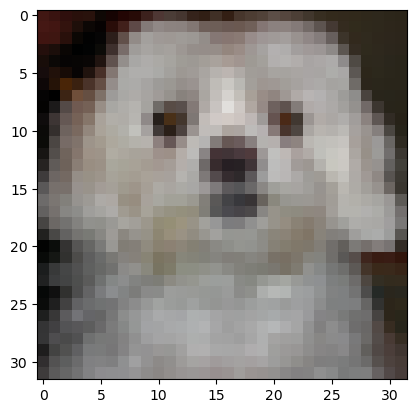

In [8]:
import cv2 as cv              # open vision library OpenCV

def _load_label_names():
    """
    Load the label names from file
    """
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_stats(sample_id):
    """
    Display Stats of the the dataset
    """
    features, labels = X_trainReshapeImageRow, y_train

    print('Samples (cantidad de imágenes): {}'.format(len(features)))
    print('Cantidad de Etiquetas: {}'.format(dict(zip(*np.unique(labels, return_counts=True)))))
    #print('Primeras 20 Etiquetas: {}'.format(labels[:20]))

    sample_image = features[sample_id]
    sample_label = labels[sample_id][0]
    label_names = _load_label_names()

    print('\nImagen {}:'.format(sample_id))
    print('Imagen - Valor Min: {} Valor Max: {}'.format(sample_image.min(), sample_image.max()))
    print('Imagen - Shape: {}'.format(sample_image.shape))
    print('Etiqueta - Etiqueta Id: {} Nombre: {}'.format(sample_label, label_names[sample_label]))
    #plt.axis('off')
    imagen=sample_image.reshape(32, 32, 3)#.transpose(1, 2, 0)
    plt.imshow(imagen)
    cv.imwrite('imagen.jpg', imagen)

sample_id = 9929
display_stats(sample_id)

##  <span style="color:BLUE">CARGA DE DATASET Y PREPROCESAMIENTO</span>

In [9]:
#normalizamos tanto X_train como X_test
def guardarRNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")   
    
def cargarRNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model
print('Funciones definidas')

#Primera forma
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

#x_train = normalize(X_train)
#x_test = normalize(X_test)

#Segunda forma
x_train = X_train/255
x_test = X_test/255

print("Normalización lista")
#Ejemplo para verificar
print('x:',X_test[9999,1,1,1])
print("""x':""",x_test[9999,1,1,1])

Funciones definidas
Normalización lista
x: 89
x': 0.34901960784313724


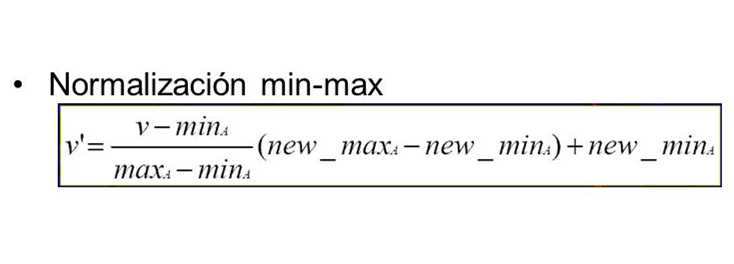

In [10]:
x_train=X_trainReshapeImageRow
x_test=X_testReshapeImageRow

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [12]:
# Proceso Clasificación con Red Neuronal

# Añade aquí tu código

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(328, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(174, activation='relu'))
model.add(Dense(132, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
#en la última capa tiene que haber tantas neuronas como clases haya, en este caso 10
model.add(Dense(10, activation='softmax'))

#compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

size_batch = 512
epocas = 100
history = model.fit(x_train, y_train, batch_size= size_batch, epochs=epocas, verbose=1)


Epoch 1/100
98/98 [==============================] - 5s 31ms/step - loss: 37.5352 - accuracy: 0.1393
Epoch 2/100
98/98 [==============================] - 3s 31ms/step - loss: 3.3026 - accuracy: 0.2170
Epoch 3/100
98/98 [==============================] - 3s 30ms/step - loss: 2.7882 - accuracy: 0.2415
Epoch 4/100
98/98 [==============================] - 4s 39ms/step - loss: 2.9845 - accuracy: 0.2448
Epoch 5/100
98/98 [==============================] - 4s 37ms/step - loss: 2.2641 - accuracy: 0.2846
Epoch 6/100
98/98 [==============================] - 3s 31ms/step - loss: 2.0645 - accuracy: 0.3098
Epoch 7/100
98/98 [==============================] - 3s 30ms/step - loss: 2.0005 - accuracy: 0.3251
Epoch 8/100
98/98 [==============================] - 3s 30ms/step - loss: 2.0151 - accuracy: 0.3258
Epoch 9/100
98/98 [==============================] - 3s 29ms/step - loss: 1.9194 - accuracy: 0.3440
Epoch 10/100
98/98 [==============================] - 3s 30ms/step - loss: 1.9391 - accuracy: 0.340

98/98 [==============================] - 3s 33ms/step - loss: 1.1941 - accuracy: 0.5764
Epoch 83/100
98/98 [==============================] - 3s 34ms/step - loss: 1.1798 - accuracy: 0.5792
Epoch 84/100
98/98 [==============================] - 3s 32ms/step - loss: 1.1817 - accuracy: 0.5785
Epoch 85/100
98/98 [==============================] - 3s 32ms/step - loss: 1.1854 - accuracy: 0.5770
Epoch 86/100
98/98 [==============================] - 3s 35ms/step - loss: 1.1793 - accuracy: 0.5808
Epoch 87/100
98/98 [==============================] - 4s 38ms/step - loss: 1.2140 - accuracy: 0.5666
Epoch 88/100
98/98 [==============================] - 3s 35ms/step - loss: 1.1838 - accuracy: 0.5795
Epoch 89/100
98/98 [==============================] - 4s 36ms/step - loss: 1.1730 - accuracy: 0.5835
Epoch 90/100
98/98 [==============================] - 3s 36ms/step - loss: 1.1732 - accuracy: 0.5803
Epoch 91/100
98/98 [==============================] - 3s 34ms/step - loss: 1.1433 - accuracy: 0.5930
Epo

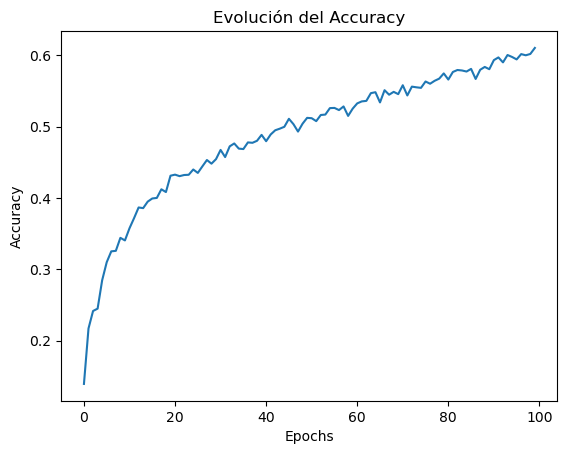

In [13]:

plt.plot(history.history['accuracy'])
plt.title('Evolución del Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.5032 - accuracy: 0.4976


[1.5032075643539429, 0.4975999891757965]

In [15]:
#Predicciones
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1) 
y_pred = y_pred.flatten()
y_test2 = y_test.flatten()
print(y_pred)
print(y_test2)
dataframeFinal=pd.DataFrame({'real':y_test2, 'predicción': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)
guardarRNN(model,'RedNeuronalMulticlase')

313/313 [==============================] - 2s 6ms/step
[3 9 0 ... 3 7 4]
[3 8 8 ... 5 1 7]
Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo


Mean Absolute Error (MAE): 1.7817
Mean Squared Error (MSE): 9.2721
Root Mean Squared Error (RMSE): 3.045
Accuracy: 0.4976
Precision:  0.5082
Recall:  0.4976
F1: 0.4951
Matriz de confusión:
[[599  20  70  33  59  11  29  21 103  55]
 [ 77 490  10  34  28  10  18  26  67 240]
 [ 83  14 294 125 216  50 111  60  17  30]
 [ 30  19  53 380 110 129 152  56  19  52]
 [ 51   4  99  66 523  22 115  85  22  13]
 [ 17   6  57 258 123 303 102  83  20  31]
 [  5   6  59  92 127  22 628  26  14  21]
 [ 44   3  45  75 140  47  37 542  15  52]
 [142  41  15  39  45  18  13  11 596  80]
 [ 75  91  10  44  16  10  19  50  64 621]]


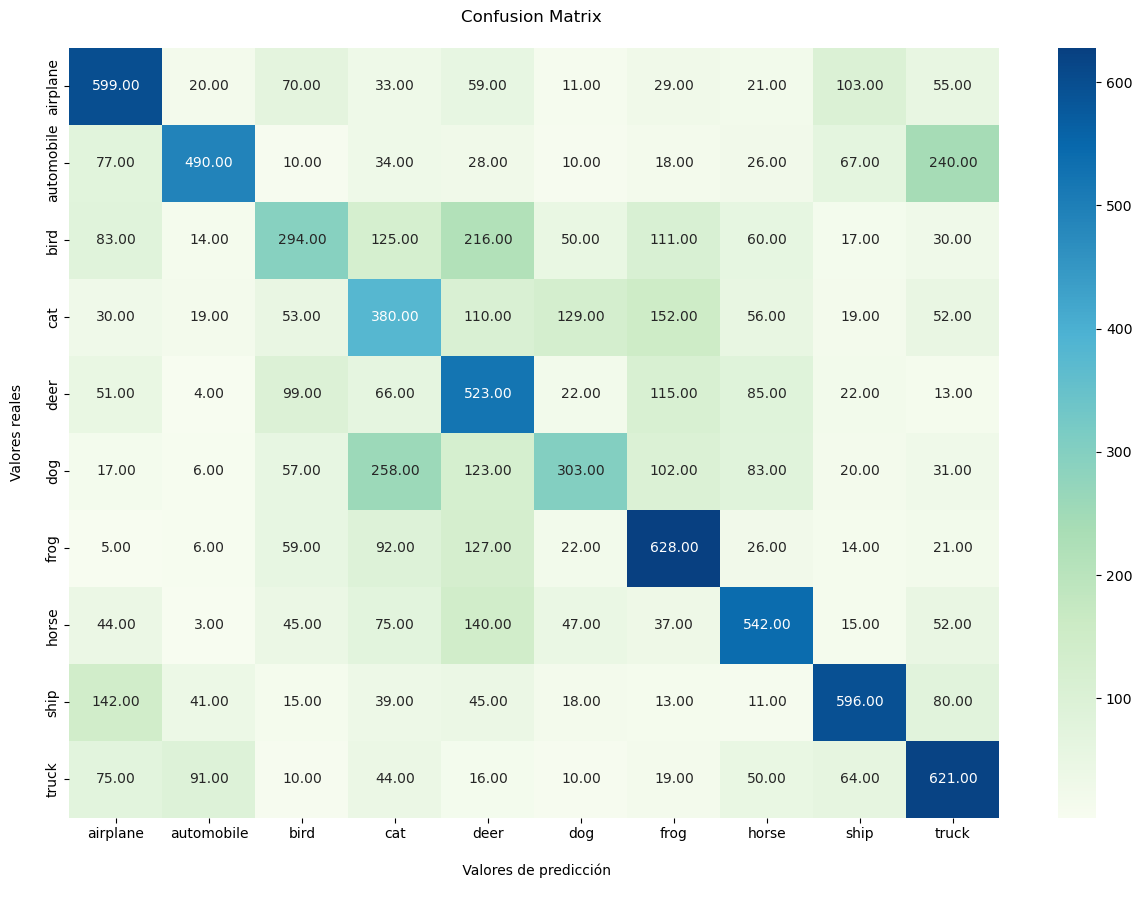

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt 

MAE=metrics.mean_absolute_error(y_test2, y_pred)
MSE=metrics.mean_squared_error(y_test2, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test2, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

accuracyModeloBase=str(accuracy_score(y_test2,y_pred))
print('Accuracy: ' + accuracyModeloBase) 

precision=precision_score(y_test2,y_pred, average='weighted')#average one of [None, 'micro', 'macro', 'weighted']
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_test2,y_pred, average='weighted')
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_test2,y_pred, average='weighted')
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
print(confusion_matrix(y_test2,y_pred))  

plt.figure(figsize=(15,10))
fx=sns.heatmap(confusion_matrix(y_test2,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Valores de predicción\n')
fx.set_ylabel('Valores reales\n');
fx.xaxis.set_ticklabels(_load_label_names())
fx.yaxis.set_ticklabels(_load_label_names())
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1000
           1       0.71      0.49      0.58      1000
           2       0.41      0.29      0.34      1000
           3       0.33      0.38      0.35      1000
           4       0.38      0.52      0.44      1000
           5       0.49      0.30      0.37      1000
           6       0.51      0.63      0.56      1000
           7       0.56      0.54      0.55      1000
           8       0.64      0.60      0.62      1000
           9       0.52      0.62      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000



##  <span style="color:BLUE">Predicción con imagen específica del conjunto de Test</span>

1/1 [==============================] - 0s 35ms/step


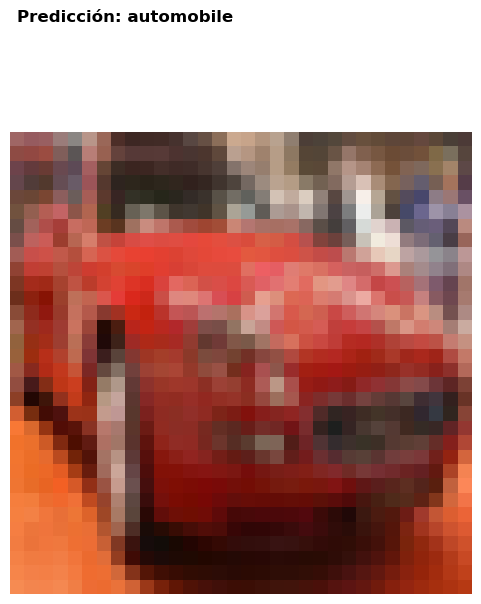

Predicción final: automobile (Valor: 0.5452)


In [18]:
import cv2
import matplotlib.pyplot as plt

# Índice de la imagen en el conjunto de datos
image_index = 5

# Obtener la imagen del conjunto de datos
image = X_trainReshapeImageRow[image_index]

# Cargar y preprocesar la imagen
image = image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(image)
predictions = predictions.flatten()

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

# Mostrar la imagen con el resultado en la parte superior
fig = plt.figure(figsize=(6, 6))
plt.text(0, -9, 'Predicción: {}'.format(predicted_class_name), fontsize=12, weight='bold', ha='left', va='top')
plt.imshow(image.reshape(32, 32, 3))
plt.axis('off')
plt.show()

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))


##  <span style="color:BLUE">Predicción con  imagen nueva indicando el PATH</span>

1/1 [==============================] - 0s 33ms/step


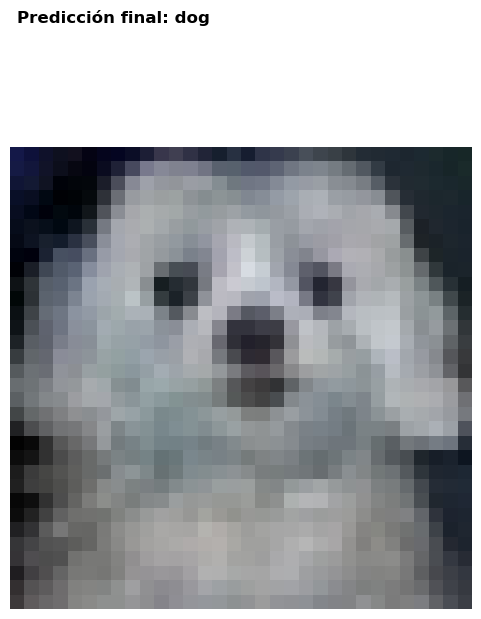

Predicción final: dog (Valor: 0.7572)


In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen en tu escritorio
image_path = "imagen.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Dimensiones deseadas
desired_width = 32
desired_height = 32

# Redimensionar la imagen
resized_image = cv2.resize(image, (desired_width, desired_height))

# Aplanar la imagen
flattened_image = resized_image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(flattened_image)
predictions = predictions.flatten()

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

# Mostrar la imagen con el nombre de la predicción en la parte superior
fig = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.text(0, -10, 'Predicción final: {}'.format(predicted_class_name), fontsize=12, fontweight='bold', color='black', ha='left', va='top')
plt.show()

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))

1/1 [==============================] - 0s 19ms/step


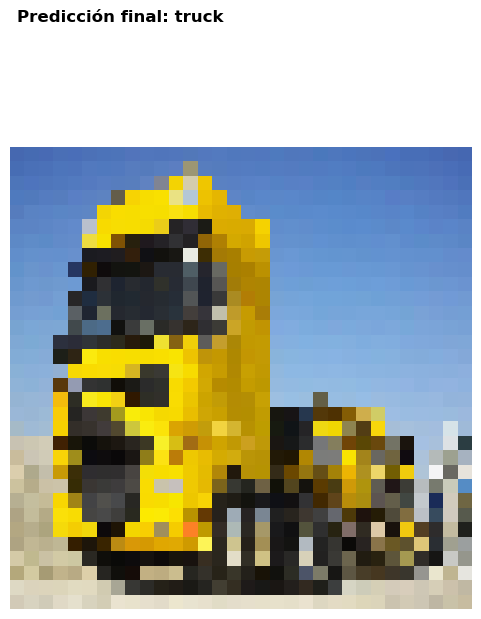

Predicción final: truck (Valor: 0.9203)


In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen en tu escritorio
image_path = "cam.jpg"

# Cargar la imagen
image = cv2.imread(image_path)

# Dimensiones deseadas
desired_width = 32
desired_height = 32

# Redimensionar la imagen
resized_image = cv2.resize(image, (desired_width, desired_height))

# Aplanar la imagen
flattened_image = resized_image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(flattened_image)
predictions = predictions.flatten()

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

# Mostrar la imagen con el nombre de la predicción en la parte superior
fig = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.text(0, -10, 'Predicción final: {}'.format(predicted_class_name), fontsize=12, fontweight='bold', color='black', ha='left', va='top')
plt.show()

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))

##  <span style="color:BLUE">Predicción con imagen capturada desde una cámara</span>

1/1 [==============================] - 0s 18ms/step


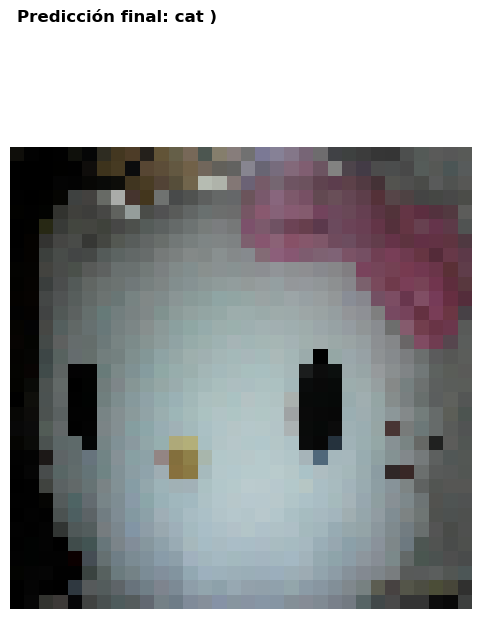

Predicción final: cat (Valor: 0.5077)


In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Obtener el nombre de las etiquetas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Capturar imagen desde la cámara
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

# Dimensiones deseadas
desired_width = 32
desired_height = 32

# Redimensionar la imagen capturada
resized_image = cv2.resize(frame, (desired_width, desired_height))

# Aplanar la imagen
flattened_image = resized_image.reshape(1, -1)

# Realizar la predicción
predictions = model.predict(flattened_image)
predictions = predictions.flatten()

# Mostrar la imagen capturada con el resultado de la predicción
fig = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.text(0, -10, 'Predicción final: {} )'.format(predicted_class_name), fontsize=12, fontweight='bold', color='black', ha='left', va='top')
plt.show()

# Obtener la clase con el valor más alto como predicción final
predicted_class_index = predictions.argmax()
predicted_class_name = label_names[predicted_class_index]
predicted_class_value = predictions[predicted_class_index]

print('Predicción final: {} (Valor: {:.4f})'.format(predicted_class_name, predicted_class_value))

# Liberar la cámara
cap.release()
cv2.destroyAllWindows()


<h4> Resultados y Conclusiones</h4>

<ul>
    <h3>Descripcion del dataset</h3>
<li>El dataset CIFAR-10 tiene 60 000 imágenes en color de 32 por 32 píxeles en diez clases que son los siguientes <b>(avión, automóvil,pájaro,gato,Ciervo,perro,rana,caballo,navío,camión) </b>, cada una con 6000 imágenes.Separamos 80% para train (50 000) y 20% para test (10 000) .</li>

<li>Para poder trabajar con imagenes necesitamos primero realizar una normalización para poder estandarizar todos los samples, por lo que nuestras imagenes que estan en formato de array de [32,32,3] por ser una imagen de 32x32 y tener 3 canales que significa que es una imagen a color, la normalizamos para que toda la información se encuentre en una sola fila obteniendo 3072.</li>
    
<li>Creamos una arquitectura de nuestra red neuronal de 6 capas, donde la primera recibia las 3072 variables que venian del reshape y la union de los canales, y esta tenia 328 neuronas , la 2da capa con 174, la 3ra con 132, la 4ta con 80, la 5 con 50 y la ultima capa de salida que tiene 10 neuronas debido a que tenemos 10 clases pero la función de activación ahora es softMax ya que con ayuda de esta función obtendremos el valor más alto de nuestro vector a la hora de hacer nuestro train.</li>
        
<li>Utilizamos en nuestra función de perdida la Sparse Categorical CrossEntropy porque al ser un problema multiclase obtenemos varias probabilidades de resultados para cada clase por cada sample, pero nosotros en este caso solo queremos una variable de salida, pero si este no fuera el caso prodiamos usar el Categorical CrossEntropy .</li>
    
<li>Con la red neuronal, buscamos minimizar la pérdida en busca de un valor cercano a 0 y mejorar el accuracy para acercarnos a 1. En nuestro modelo, logramos una pérdida de 1.5032 y un accuracy de 0.4976. La gráfica de evolución de la red neuronal nos permitió observar cual fue la evolución del accuracy durante el entrenamiento para un mejor ánalisis. Realizamos 100 epochs ya que notamos que al poner más de 100 el número de epochs no condujo a mejoras significativas en el modelo, sino que se estabilizo. Vemos que si buscaramos una mejor optimización podriamos empezar con la arquitectura de la RN .</li>

<li>Al momento de hacer nuestra preddicción debemos de hacer que nuestra nueva imagen este igualmente normalizada, por lo que tambien se tiene que transformar a 32x32 y con ayuda del flatten convertimos nuestra estructura de 2 dimensiones en 1 dimensión, y para que se elija correctamente que valor de salida obtendremos especificamos a nuestra predicción que use el argMax que busca el valor mayor en el vector de resultado que obtendremos.</li>
    
    
<li>Como recomendación. en este caso nuestro dataset no era muy amplio (60 000 samples) asi que no hubo necesidad de hacer un ahorro de recursos, pero en cambio en dataset más amplios es más recomendable hacer el cambio a un solo canal para el ahorro tanto de recursos del CPU como de tiempo pero.<b> SIEMPRE Y CUANDO EL MODELO NO ESTE DESTINADO A SER UN SISTEMA CRITICO/SALUD</b></li>
<li>El (MAE=1.7817), indica la diferencia de unidades entre los valores reales y los valores predichos. El (MSE=9.2721) indica que la discrepancia promedio al cuadrado entre las predicciones y los valores reales. El  (RMSE=3.045) indica que, en promedio, las predicciones difieren del valor real en aproximadamente 3.045 unidades. La (Accuracy=0.4976), lo que significa que el modelo clasificó correctamente el 49.76% de las muestras.La Precision (precisión=0.5082)podemos deducir que esta un modelo moderado con respecto a los positivos.El (Recall=0.4976) esta un resultado comedido sin embargo se puede mejorar ya que nuestro objetivo es llegar a 1. En (F1: 0.4951) indica que el modelo esta un equilibrio moderado entre precisión y recall en la detección de imagenes.En la matriz de confusión en las clases tenemos lo verdaderos positivos (avión=599, automóvil=490,pájaro=294, gato=380,Ciervo=523,perro=303,rana=628,
caballo=542,navío=596,camión=621) podemos deducir que tiene mejor predicción es la rana ya que tiene un 628 que ha identificado correctamente</li>   

<li><b>Para la predicción. En la primera predicción usamos imagen especifica dentro del conjunto test de un automovil que  nos dio como resultado (automobile: 0.5452) por lo cual reconocio correctamente. En la segunda predicción usamos imagen nueva indicando el PATH subimos una imagen de un perro que nos dio un resultado (dog: 0.7572) y de un camión con un resultado (truck : 0.9203)y vemos que la predicción es correcta. En la tercera predicción usamos una magen capturada desde una cámara, en este caso capturamos la firgura de un gato que nos dio resultado en la predicción (cat: 0.5077) que  reconocio correctamente</b></li>


<h4> Referencias</h4>


<ul>
  
<li>CIFAR-10 and CIFAR-100 datasets. (s/f). Toronto.edu. Recuperado el 6 de julio de 2023, de https://www.cs.toronto.edu/~kriz/cifar.html</li>
    
    
<li>(S/f). Machinelearningmastery.com. Recuperado el 6 de julio de 2023, de https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/ </li>
    
<li>Juan, R. Q., & Mario, C. M. (2011). Redes neuronales artificiales para el procesamiento de imágenes, una revisión de la última década. RIEE&C, Revista de Ingeniería Eléctrica, Electrónica y Computación, 9(1), 7-16.</li>

